In [1]:
#Maksudul Haque
#18-36962-1
#CVPR SEC:A
import os
import numpy as np
import cv2
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPool2D 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import string
%matplotlib inline

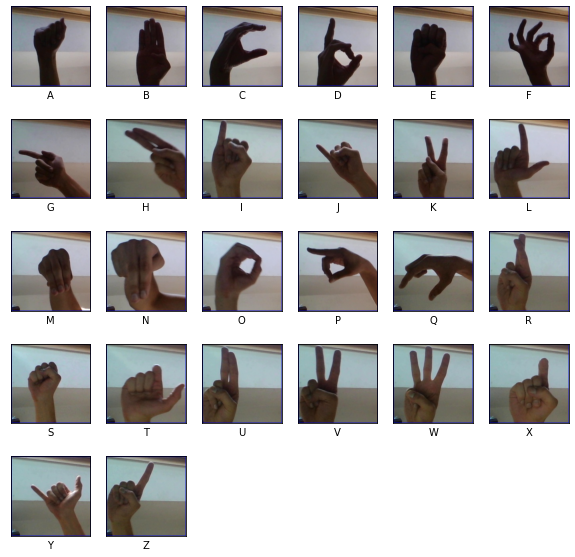

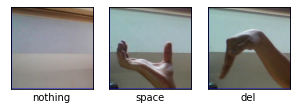

In [2]:
#Reading data from the disk and showing data through subplot
train_dir = r'E:\Course\Computer vision and pattern recognition\Dataset\asl_alphabet_train\asl_alphabet_train'
test_dir = r'E:\Course\Computer vision and pattern recognition\Dataset\asl_alphabet_test\asl_alphabet_test'
alphabets = string.ascii_uppercase #loads all the alphabets in uppercase
extra_char=['nothing', 'space', 'del'] #3 extra folders that needs reading

plt.figure(figsize=(10,10))
for i in range (26):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(alphabets[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(alphabets[i])

plt.figure(figsize=(5,5))
for j in range (3):
    plt.subplot(1,3,j+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(extra_char[j])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(extra_char[j])

In [3]:
#loading the data from disk through loop
def load_data(train_dir):
    destination = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'del', 'space'] #rather than making to separate entities for easier looping listed all the desinations in an array
    images = []
    labels = []
    size = 32,32
    index = -1
    for folder in tqdm(os.listdir(train_dir),desc='Overall Progress'):
        index +=1
        print('Folder : '+destination[index])
        for image in tqdm(os.listdir(train_dir + "/" + folder)):
            t_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            t_img = cv2.resize(t_img, size)
            images.append(t_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)
    
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(train_dir)
print('Loading:', time() - start)

Overall Progress:   0%|          | 0/29 [00:00<?, ?it/s]

Folder : A


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : B


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : C


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : D


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : E


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : F


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : G


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : H


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : I


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : J


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : K


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : L


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : M


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : N


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : O


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : P


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : Q


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : R


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : S


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : T


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : U


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : V


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : W


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : X


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : Y


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : Z


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : nothing


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : del


  0%|          | 0/3000 [00:00<?, ?it/s]

Folder : space


  0%|          | 0/3000 [00:00<?, ?it/s]

Loaded 78300 images for training, Train data shape = (78300, 32, 32, 3)
Loaded 8700 images for testing Test data shape = (8700, 32, 32, 3)
Loading: 62.856772661209106


In [4]:
#VGG-16 model
model = Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [5]:
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1, shuffle = True, verbose=1)

Epoch 1/10
551/551 [==============================] - 52s 94ms/step - loss: 2.6042 - accuracy: 0.1536 - val_loss: 1.8332 - val_accuracy: 0.3208
Epoch 2/10
551/551 [==============================] - 51s 93ms/step - loss: 1.2251 - accuracy: 0.5363 - val_loss: 0.6235 - val_accuracy: 0.7613
Epoch 3/10
551/551 [==============================] - 51s 93ms/step - loss: 0.3965 - accuracy: 0.8553 - val_loss: 0.2557 - val_accuracy: 0.9128
Epoch 4/10
551/551 [==============================] - 51s 93ms/step - loss: 0.1425 - accuracy: 0.9507 - val_loss: 0.1476 - val_accuracy: 0.9504
Epoch 5/10
551/551 [==============================] - 51s 93ms/step - loss: 0.0922 - accuracy: 0.9699 - val_loss: 0.0522 - val_accuracy: 0.9819
Epoch 6/10
551/551 [==============================] - 51s 93ms/step - loss: 0.0681 - accuracy: 0.9771 - val_loss: 0.0425 - val_accuracy: 0.9872
Epoch 7/10
551/551 [==============================] - 51s 93ms/step - loss: 0.0493 - accuracy: 0.9836 - val_loss: 0.0351 - val_accuracy:

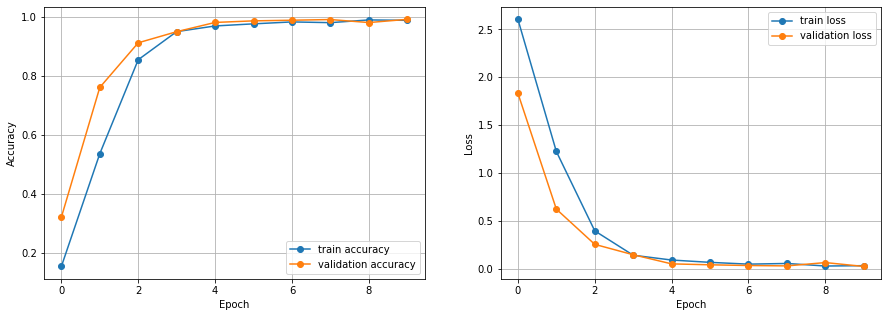

In [6]:
#showing the accuracies in a graphical output...
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()